## Doğrulayıcı Faktör Analizi

Veri seti, Endonezya bağlamında tükenmişliği öngören yordayıcılar olarak Öğretmen Benlik Kavramı (TSC) ve Öğretmen Yeterliliği (TE) arasındaki ilişkiyi sunmaktadır. Bu çalışmada yer alan tükenmişliğin bileşenleri Duyarsızlaşma (DP) ve Azaltılmış Kişisel Başarı (RPA) şeklindedir.

In [23]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
import semopy
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

https://data.mendeley.com/datasets/6jmv43nffk/2/files/b12fd698-1013-4528-a476-cc5df7f62ed6

In [105]:
df = pd.read_excel("response.xlsx")
df = df.drop(["EE1", "EE2", "EE3", "EE4", "EE5"], axis=1)
df.head()

,TSC1,TSC2,TSC3,TSC4,TSC5,TE1,TE2,TE3,TE4,TE5,DE1,DE2,DE3,RPA1,RPA2,RPA3,RPA4,RPA5
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,4,4,5,4,5,5,4,4,5,4,5,5,5,5,4,5,4,5
3,4,4,5,4,5,5,4,4,5,4,5,5,5,5,4,5,4,5
4,4,5,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


## Tanımsal İstatistikler

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TSC1,876.0,3.652968,0.684942,1.0,3.0,4.0,4.0,5.0
TSC2,876.0,3.809361,0.638895,2.0,3.0,4.0,4.0,5.0
TSC3,876.0,3.731735,0.639605,2.0,3.0,4.0,4.0,5.0
TSC4,876.0,3.708904,0.673388,2.0,3.0,4.0,4.0,5.0
TSC5,876.0,3.821918,0.652222,2.0,3.0,4.0,4.0,5.0
TE1,876.0,4.060502,0.712174,1.0,4.0,4.0,5.0,5.0
TE2,876.0,4.043379,0.698039,2.0,4.0,4.0,5.0,5.0
TE3,876.0,4.121005,0.705224,1.0,4.0,4.0,5.0,5.0
TE4,876.0,4.105023,0.689793,1.0,4.0,4.0,5.0,5.0
TE5,876.0,3.901826,0.754080,1.0,3.0,4.0,4.0,5.0


In [107]:
df.corr()

,TSC1,TSC2,TSC3,TSC4,TSC5,TE1,TE2,TE3,TE4,TE5,DE1,DE2,DE3,RPA1,RPA2,RPA3,RPA4,RPA5
TSC1,1.000000,0.436259,0.436822,0.390276,0.490833,0.291438,0.399633,0.392245,0.369916,0.345523,0.315711,0.247482,0.309334,0.381045,0.379251,0.363093,0.301241,0.272033
TSC2,0.436259,1.000000,0.489987,0.457932,0.480674,0.372000,0.326078,0.355637,0.442249,0.354888,0.246836,0.253156,0.318880,0.389698,0.362432,0.359664,0.287838,0.267924
TSC3,0.436822,0.489987,1.000000,0.420821,0.460663,0.324203,0.284631,0.282344,0.341100,0.338675,0.272630,0.251618,0.363504,0.323771,0.306452,0.305070,0.269000,0.190966
TSC4,0.390276,0.457932,0.420821,1.000000,0.446499,0.263160,0.272460,0.257157,0.326695,0.326268,0.184981,0.315938,0.251336,0.361748,0.309660,0.323493,0.274087,0.239376
TSC5,0.490833,0.480674,0.460663,0.446499,1.000000,0.384905,0.380973,0.389787,0.412496,0.343175,0.293115,0.192600,0.289807,0.433699,0.410871,0.346273,0.328792,0.281923
TE1,0.291438,0.372000,0.324203,0.263160,0.384905,1.000000,0.580942,0.608896,0.698933,0.436689,0.279692,0.233941,0.353125,0.401183,0.369119,0.346296,0.302031,0.280501
TE2,0.399633,0.326078,0.284631,0.272460,0.380973,0.580942,1.000000,0.616153,0.591028,0.472731,0.265693,0.221725,0.325721,0.387700,0.401224,0.360063,0.331758,0.297926
TE3,0.392245,0.355637,0.282344,0.257157,0.389787,0.608896,0.616153,1.000000,0.695093,0.540286,0.280038,0.196842,0.295532,0.431495,0.411303,0.391161,0.370598,0.347920
TE4,0.369916,0.442249,0.341100,0.326695,0.412496,0.698933,0.591028,0.695093,1.000000,0.560338,0.347351,0.299256,0.395715,0.449205,0.443494,0.425901,0.385738,0.351052
TE5,0.345523,0.354888,0.338675,0.326268,0.343175,0.436689,0.472731,0.540286,0.560338,1.000000,0.305625,0.293897,0.278406,0.361882,0.370728,0.363212,0.318440,0.348048


<AxesSubplot:>

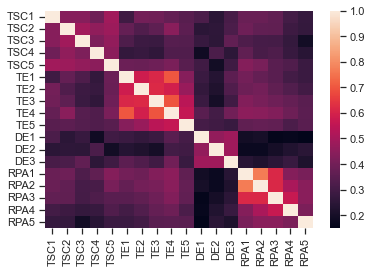

In [108]:
sns.heatmap(df.corr())

In [109]:
report = sweetviz.analyze(df)
report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Değişkenler arasındaki ilişki doğrusal olmalıdır. Bunu pair plot ile görebiliriz. 

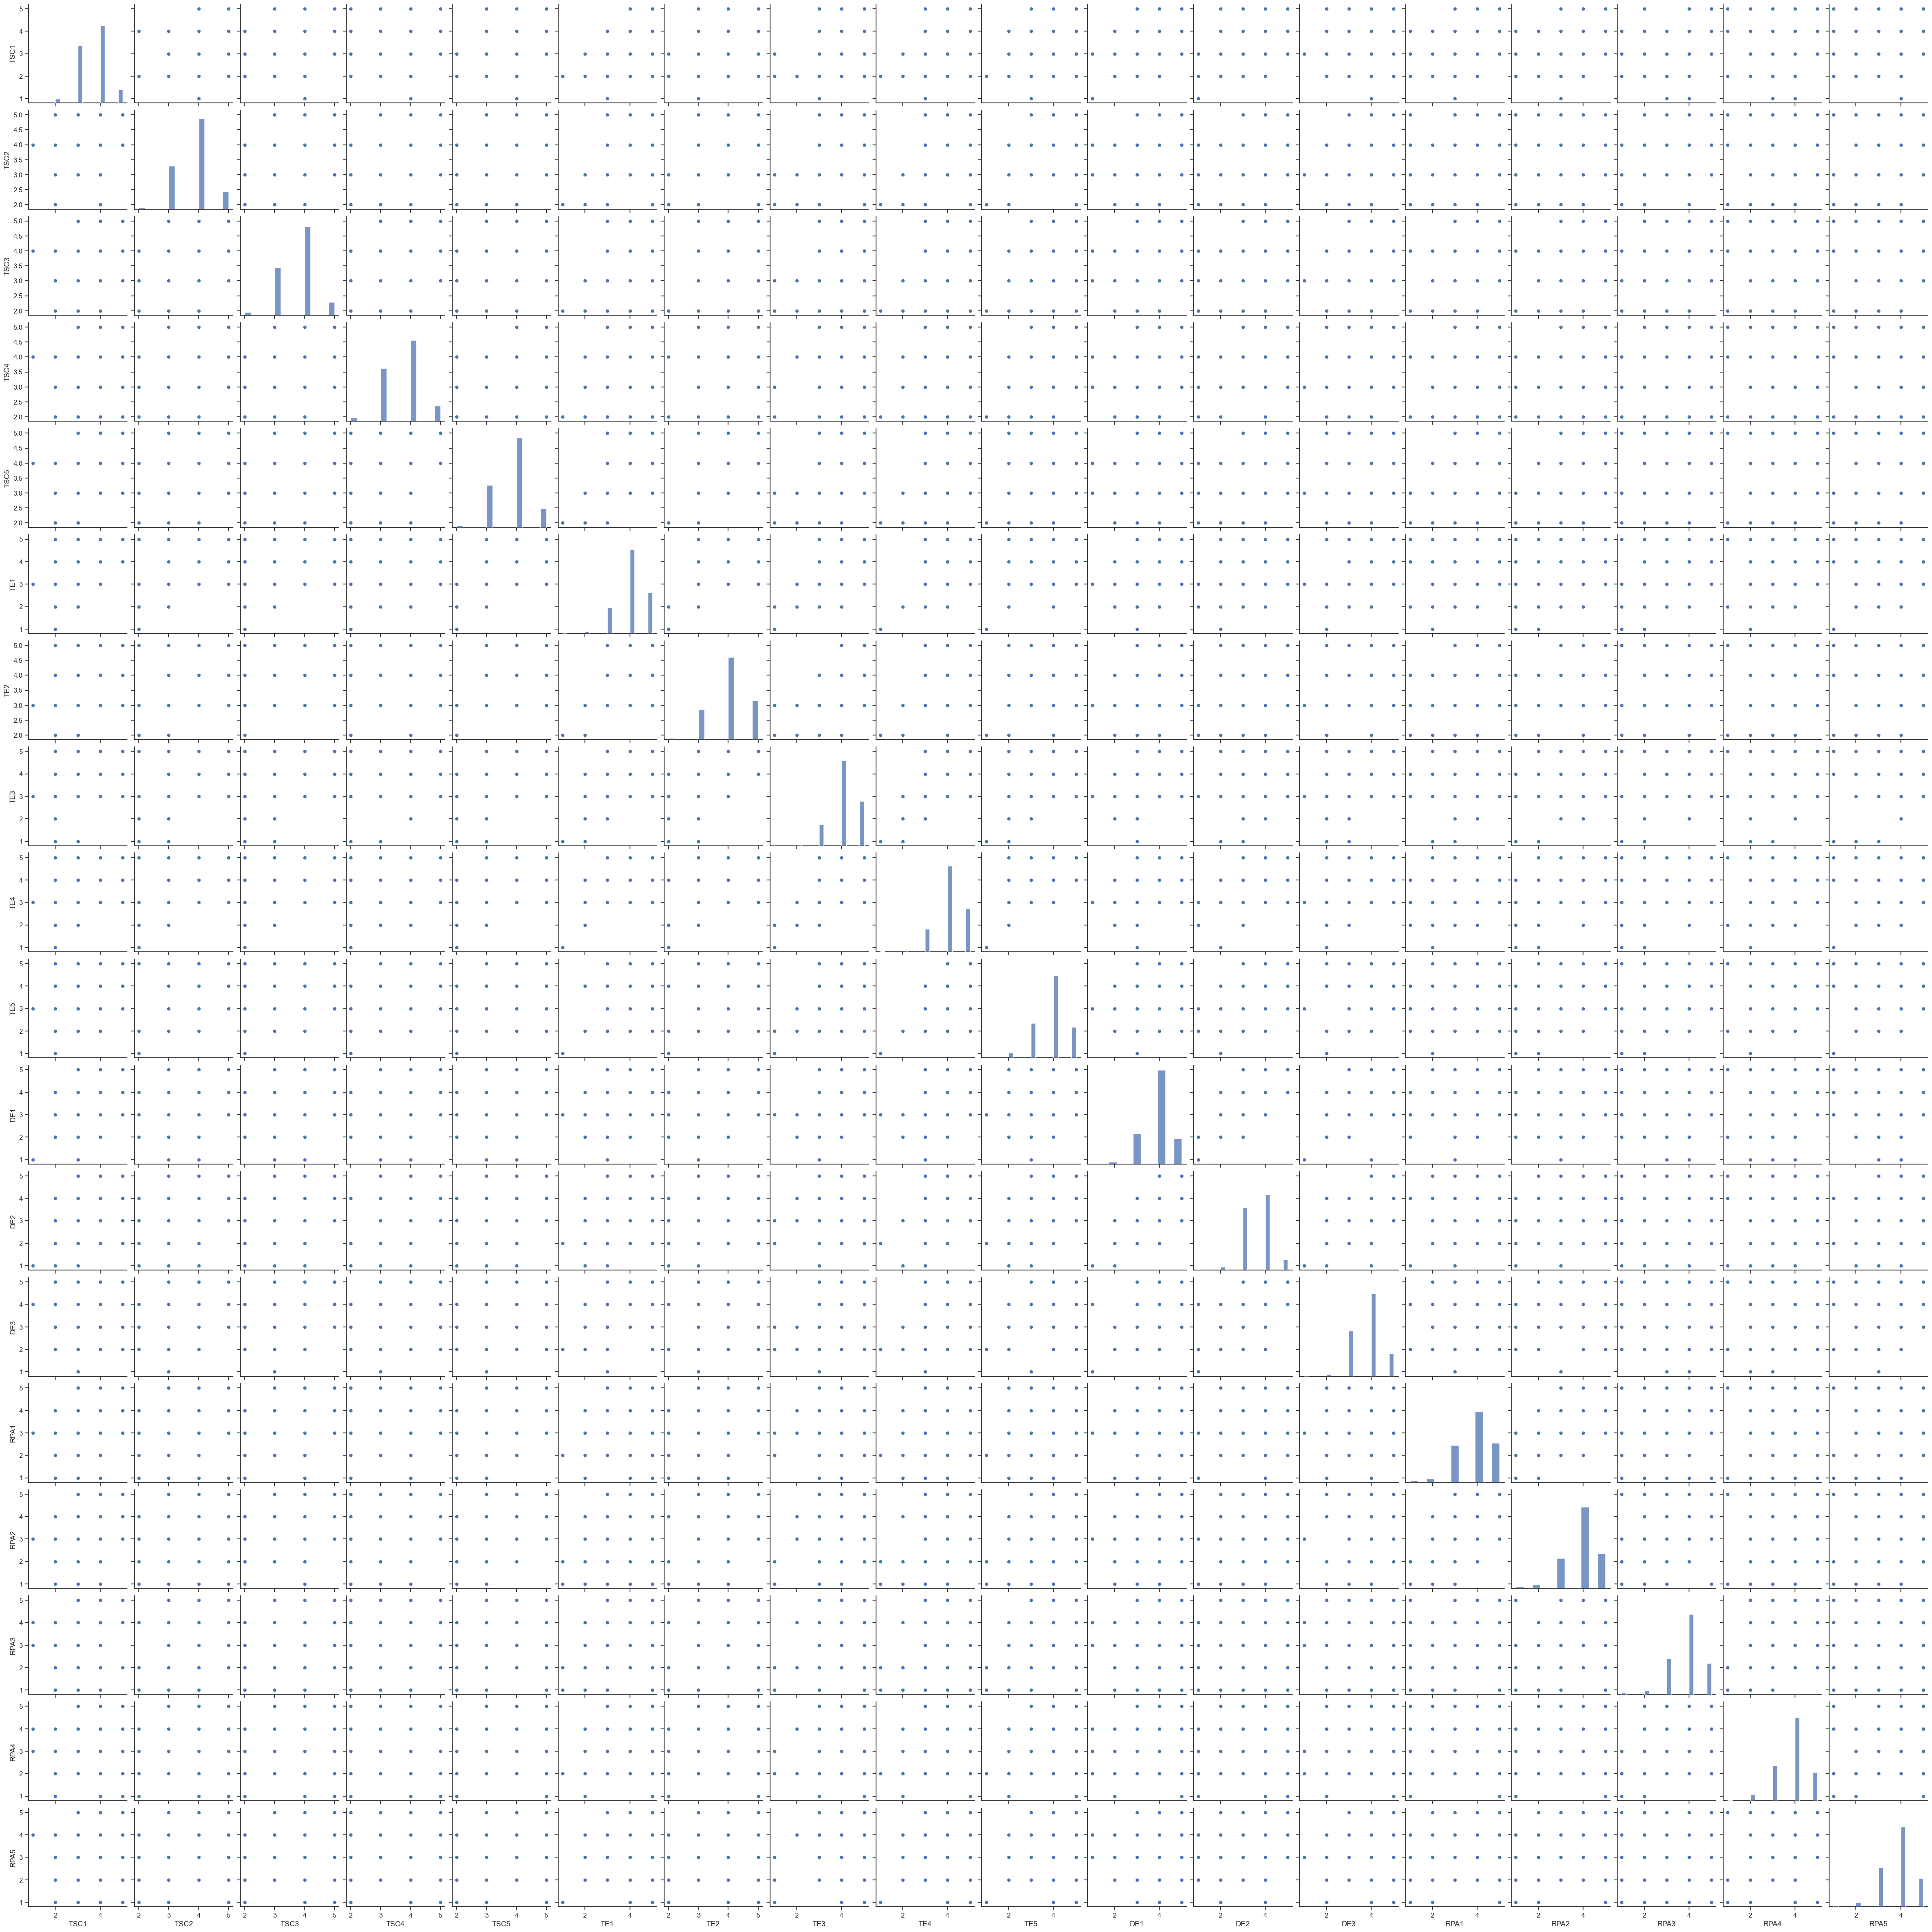

In [110]:
sns.set_theme(style="ticks")
sns.pairplot(df)

## Çoklu Normal Dağılım

In [111]:
from pingouin import multivariate_normality
multivariate_normality(df, alpha=.05)

HZResults(hz=1.346410212908239, pval=0.0, normal=False)

H0 red, normal dağılıma uygun değildir. 

## Faktör Analizi

### KMO-Bartlett Testi

In [112]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(df)
print("Ki kare değeri : ",chi2)
print("p değeri : ",p)

Ki kare değeri :  7156.147766892889
p değeri :  0.0


In [113]:
## Kaiser-Meyer-Olkin (KMO) Test is a measure of how suited your data is for Factor Analysis.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars, kmo_model = calculate_kmo(df)
print("KMO ölçüsü:", kmo_model)

KMO ölçüsü: 0.9195350541028067


Veri setimiz faktör analizi için uygundur. 

## Scree Plot ile Faktör Sayısının Belirlenmesi

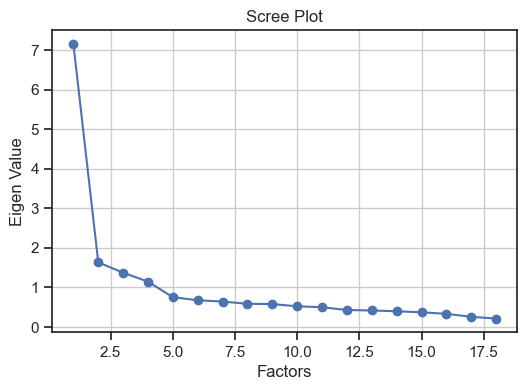

In [114]:
 from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])
fa.fit(df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Öz değer yaklaşımına göre 1'den büyük öz değerler faktör oluşturabilir. Bu sebeple 4 faktör türetilmesi uygundur. Bununla beraber veri setinden değişkenlerin 4 faktörde toplanmasını bekliyorduk.

## Faktör Yükleri (Döndürülmüş)

In [117]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)
loading=pd.DataFrame(fa.loadings_,columns=["1.Faktör", "2.Faktör", "3.Faktör",
                                        "4.Faktör"], index=df.columns)
loading[loading < 0.3] = "-"
print(loading)

      1.Faktör  2.Faktör  3.Faktör  4.Faktör
TSC1         -         -  0.525168         -
TSC2         -         -  0.604226         -
TSC3         -         -  0.617943         -
TSC4         -         -   0.55226         -
TSC5         -         -   0.60715         -
TE1   0.694562         -         -         -
TE2   0.638726         -         -         -
TE3   0.753319         -         -         -
TE4   0.745779         -         -         -
TE5   0.487285         -         -         -
DE1          -         -         -  0.580715
DE2          -         -         -   0.70157
DE3          -         -         -  0.621788
RPA1         -    0.7035  0.305597         -
RPA2         -  0.769952         -         -
RPA3         -  0.714076         -         -
RPA4         -  0.572135         -         -
RPA5         -   0.49692         -         -


RPA1 ölçümünün 2 faktörde toplandığı görülmektedir fakat faktör yükleri arasındaki farklı 0.1'dan büyük olması sebebiyle bu ölçüm 2. faktörde bırakılmıştır. 

## Açıklanan Toplam Varyans

In [118]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          2.795357  2.756389  2.296112  1.605604
Proportional Var  0.155298  0.153133  0.127562  0.089200
Cumulative Var    0.155298  0.308430  0.435992  0.525192


1. faktör toplam varyansın %15'ini, 2. faktör toplam varyansın %15'ini, 3. ve 4 faktör ise sırasıyla toplam varyansın %12 ve %8'ini açıklamaktadır. Tüm faktörlerin açıklanan toplam varyansı ise %52'dir.

## Communalities

In [119]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']).sort_values(by="Communalities"))

      Communalities
RPA5       0.333082
TSC4       0.398948
TE5        0.419944
DE1        0.421466
RPA4       0.423257
TSC1       0.424493
TSC3       0.473748
TSC2       0.490540
DE3        0.500305
TSC5       0.509694
TE2        0.537353
DE2        0.537796
TE1        0.593566
RPA3       0.608553
RPA1       0.647895
TE3        0.688009
RPA2       0.705574
TE4        0.739240


Ortak varyanslar incelendiğinde, 0'a ve 1'e çok yakın değerlerin bulunmaması gerekir. Burada ortak varyanslar kabul edilebilir düzeydedir.

Faktörler
- Teacher Self-Concept (TSC)/Öğretmen Benlik Kavramı 
- Teacher Efficacy (TE)/Öğretmen Yeterliliği
- Depersonalization (DP)/Duyarsızlaşma
- Reduced Personal Accomplishment (RPA)/Azaltılmış Kişisel Başarı

Her bir faktör kendisini ölçen değişkenlerin altında toplanmıştır. 